In [1]:
import pandas as pd
import seaborn as sns


In [13]:
import pickle
filename = '/data2/Projects/eeg_fmri_natview/derivatives/sub-01/ses-01/eeg/sub-01_ses-01_task-monkey1_run-01_desc-RawBk_eeg.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
#pivoted = cap.pivot(index = 'electrode', columns='frequency_Hz', values = 'pearson_r')

In [5]:
import matplotlib.pyplot as plt
def plot_heatmap(cap, title):
    # Define the desired anatomical order
    desired_order = [
        'frontopolar', 'frontal', 'anterior-frontal', 'fronto-temporal', 
        'temporal', 'fronto-central', 'central', 'centro-parietal', 'parietal', 
        'temporo-parietal', 'parieto-occipital', 'occipital'
    ]

    heatmap_data = cap.pivot_table(
        index='ch_name',
        columns='frequency_Hz',
        values='pearson_r',
        aggfunc='mean'
    )

    # Sort electrodes by anatomy
    sorted_data = cap[['ch_name', 'anatomy']].drop_duplicates().set_index('ch_name')
    heatmap_data = heatmap_data.loc[sorted_data.sort_values('anatomy').index]

    # Sort the electrodes by the desired anatomical order
    sorted_anatomy = sorted_data.loc[
        sorted_data['anatomy'].astype('category').cat.set_categories(desired_order, ordered=True).sort_values().index
    ]

    # Reorder the heatmap data based on the sorted anatomy
    sorted_heatmap_data = heatmap_data.loc[sorted_anatomy.index]

    # Plot the heatmap with sorted anatomical groups
    figure = plt.figure(figsize=(15, 13))
    ax = sns.heatmap(
        sorted_heatmap_data,
        cmap='bwr',
        cbar_kws={'label': 'Pearson Correlation'},
        annot=False,
        linewidths=0.5,
        #linecolor='black',
        #vmin = -1,
        #vmax = 1
    )

    # Add separators and labels for sorted anatomical groups
    current_position = 0
    for anatomy in desired_order:
        indices = sorted_anatomy.groupby('anatomy').groups[anatomy]
        next_position = current_position + len(indices)
        # Add a horizontal line to separate anatomical groups
        ax.hlines(y=next_position, xmin=-2, xmax=len(sorted_heatmap_data.columns), colors='black', linewidth=2)
        # Add a single anatomical region label
        ax.text(
            x=-1.5, 
            y=(current_position + next_position) / 2, 
            s=anatomy.capitalize(), 
            fontsize=10, 
            color='black', 
            va='center', 
            ha='right', 
            rotation=0, 
            fontweight='bold'
        )
        current_position = next_position

    # Adjust labels and title
    ax.set_title(f'Correlation (yhat,ytest) {title}', fontsize=16)
    ax.set_xlabel('Frequency (Hz)', fontsize=14)
    ax.set_ylabel('')
    #ax.set_yticklabels('')
    plt.tight_layout()
    #plt.show()
    return ax, figure

In [6]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("individual_eval_custom_env_adjusted.pdf")
caps = [c for c in range(1,9)]
for subject in range(23):
    print(subject)
    try:
        df = pd.read_csv(f"/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-{subject:02}_task-checker_desc-CustomEnvBk_predictions.csv")
    except Exception as e:
        print(e)
        continue
    for cap in caps:
        cap_df = df.loc[df['ts_CAPS'] == f'CAP{cap}', ['pearson_r', 'frequency_Hz', 'electrode']]
        anatomy = data['labels']['channels_info']['anatomy']
        names = data['labels']['channels_info']['channel_name']
        cap_df['anatomy'] = [anatomy[idx] for idx in cap_df['electrode']]
        cap_df['ch_name'] = [names[idx] for idx in cap_df['electrode']]
        ax, figure = plot_heatmap(cap_df, f"Subject {subject:02} CAP{cap}")
        pdf.savefig(figure)
        plt.close(figure)

pdf.close()

0
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-00_task-checker_desc-CustomEnvBk_predictions.csv'
1
2
3
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-03_task-checker_desc-CustomEnvBk_predictions.csv'
4
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-04_task-checker_desc-CustomEnvBk_predictions.csv'
5
6
7
8
9
10
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-10_task-checker_desc-CustomEnvBk_predictions.csv'
11
12
13
14
15
16
17
18
19
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-19_task-checker_desc-CustomEnvBk_predictions.csv'
20
21
22


# Average across subject (y = electrodes, x = frequency)

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
def plot_heatmap(cap, title, ax, colorbar = True, plot_anat = True, x_labels = True):
    # Define the desired anatomical order
    desired_order = [
        'frontopolar', 'frontal', 'anterior-frontal', 'fronto-temporal', 
        'temporal', 'fronto-central', 'central', 'centro-parietal', 'parietal', 
        'temporo-parietal', 'parieto-occipital', 'occipital'
    ]

    heatmap_data = cap.pivot_table(
        index='ch_name',
        columns='frequency_Hz',
        values='pearson_r',
        aggfunc='mean'
    )

    # Sort electrodes by anatomy
    sorted_data = cap[['ch_name', 'anatomy']].drop_duplicates().set_index('ch_name')
    heatmap_data = heatmap_data.loc[sorted_data.sort_values('anatomy').index]

    # Sort the electrodes by the desired anatomical order
    sorted_anatomy = sorted_data.loc[
        sorted_data['anatomy'].astype('category').cat.set_categories(desired_order, ordered=True).sort_values().index
    ]

    # Reorder the heatmap data based on the sorted anatomy
    sorted_heatmap_data = heatmap_data.loc[sorted_anatomy.index]

    # Plot the heatmap with sorted anatomical groups
    sns.heatmap(
        sorted_heatmap_data,
        cmap='bwr',
        cbar = colorbar,
        #cbar_kws={'label': 'Pearson Correlation'},
        annot=False,
        linewidths=0.5,
        ax = ax,
        linecolor=None,
        #linecolor='black',
        #vmin = -1,
        #vmax = 1,
    )

    # Add separators and labels for sorted anatomical groups
    current_position = 0
    for anatomy in desired_order:
        indices = sorted_anatomy.groupby('anatomy').groups[anatomy]
        next_position = current_position + len(indices)
        # Add a horizontal line to separate anatomical groups
        ax.hlines(y=next_position, xmin=-2, xmax=len(sorted_heatmap_data.columns), colors='black', linewidth=2)
        # Add a single anatomical region label
        if plot_anat:
            ax.text(
                x=-1.5, 
                y=(current_position + next_position) / 2, 
                s=anatomy.capitalize(), 
                #ontsize=10, 
                color='black', 
                va='center', 
                ha='right', 
                rotation=0, 
                fontweight='bold'
            )
        current_position = next_position
    else:
        ax.set_yticklabels('')
    
    if not x_labels:
        ax.set_xlabel('')
        ax.set_xticks([])
        

    # Adjust labels and title
    ax.set_title(f'{title}')
    ax.set_ylabel('')
    ax.set_yticks([])
    #plt.show()
    return ax

In [ ]:

caps = [c for c in range(1,9)]
r = []
dfs = []
anatomy = data['labels']['channels_info']['anatomy']
names = data['labels']['channels_info']['channel_name']
for subject in range(1,23):
    print(subject)
    try:
        df = pd.read_csv(f"/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-{subject:02}_task-checker_desc-CustomEnvBk_predictions.csv")
        df['anatomy'] = [anatomy[idx] for idx in df['electrode']]
        df['ch_name'] = [names[idx] for idx in df['electrode']]
        df.drop(columns='Unnamed: 0', inplace = True)
        dfs.append(df)
    except Exception as e:
        print(e)
        continue
df = pd.concat(dfs, axis = 0)



1
2
3
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-03_task-checker_desc-CustomEnvBk_predictions.csv'
4
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-04_task-checker_desc-CustomEnvBk_predictions.csv'
5
6
7
8
9
10
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-10_task-checker_desc-CustomEnvBk_predictions.csv'
11
12
13
14
15
16
17
18
19
[Errno 2] No such file or directory: '/home/slouviot/01_projects/eeg_brain_state_prediction/data/sub-19_task-checker_desc-CustomEnvBk_predictions.csv'
20
21
22


In [23]:
selection = df.groupby(['subject','ts_CAPS','anatomy','ch_name', 'frequency_Hz']).mean('pearson_r')

In [24]:
selection.reset_index(inplace = True)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

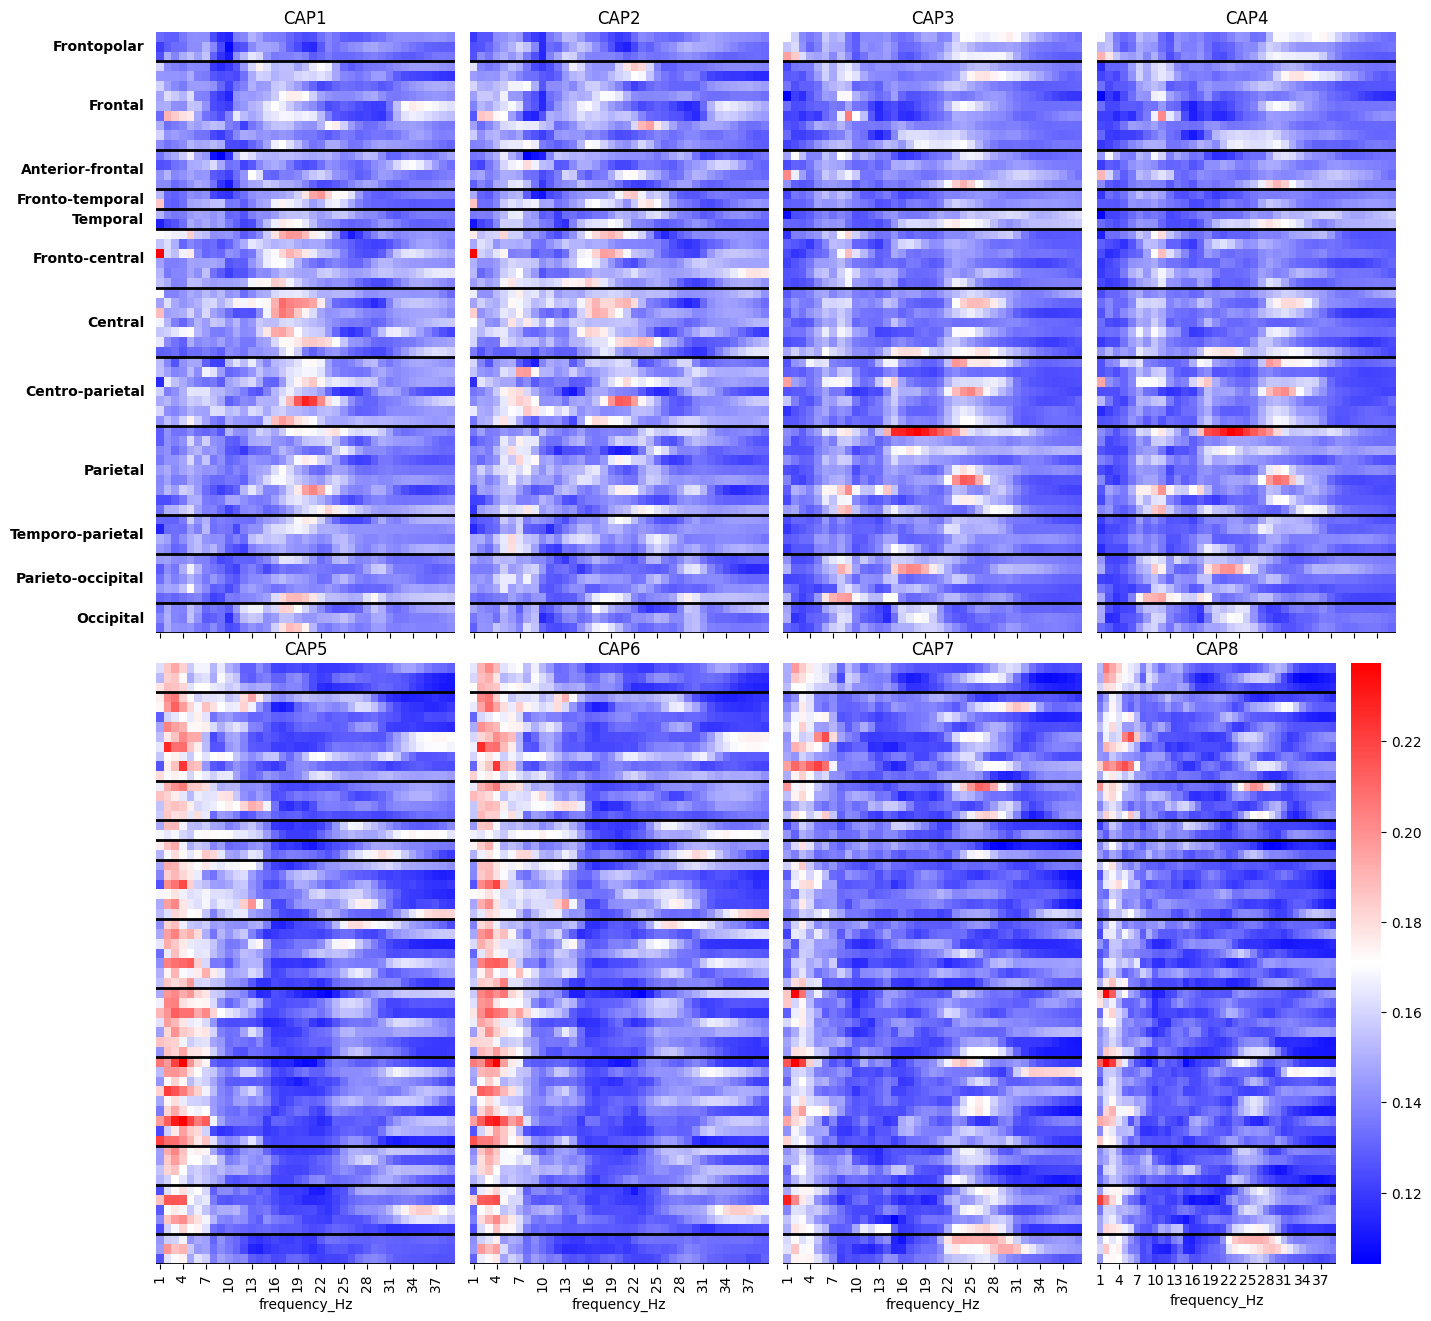

In [77]:
import matplotlib.gridspec as gridspec
caps = [c for c in range(1,9)]

#gs = gridspec.GridSpec(2, 4, figure=figure, wspace=0.05, hspace=0.05)  # Adjust wspace & hspace
figure, axes = plt.subplots(2,4, figsize = (16,16), sharex=True, 
                            sharey=True,
                            gridspec_kw= dict(wspace = 0.05, hspace = 0.05))


# Plot subplots
#axes = [figure.add_subplot(gs[i]) for i in range(8)]
for cap, ax in zip(caps, axes.flatten()):
   unique_select = selection.loc[selection['ts_CAPS'] == f'CAP{cap}']
   if cap == 1:
      plot_anatomy = True
      colorbar = False
   elif cap == 8:
      plot_anatomy = False
      colorbar = True
   else:
      plot_anatomy = False
      colorbar = False
   
   if cap < 5:
      x_labels = False
   else:
      x_labels = True
   plot_heatmap(unique_select, f"CAP{cap}", ax, colorbar=colorbar, plot_anat=plot_anatomy, x_labels=x_labels)
    #plt.tight_layout()



In [42]:
axes.shape

(2, 4)

In [79]:
import mne
montage = mne.channels.make_standard_montage('easycap-M1')

In [103]:
montage.ch

{'ch_pos': OrderedDict([('Fp1',
               array([-0.02933873,  0.09029533, -0.00331545])),
              ('Fp2', array([ 0.02933873,  0.09029533, -0.00331545])),
              ('F3', array([-0.05177571,  0.06393767,  0.0475    ])),
              ('F4', array([0.05177571, 0.06393767, 0.0475    ])),
              ('C3', array([-0.06833728, -0.        ,  0.06599255])),
              ('C4', array([0.06833728, 0.        , 0.06599255])),
              ('P3', array([-0.05177571, -0.06393767,  0.0475    ])),
              ('P4', array([ 0.05177571, -0.06393767,  0.0475    ])),
              ('O1', array([-0.02933873, -0.09029533, -0.00331545])),
              ('O2', array([ 0.02933873, -0.09029533, -0.00331545])),
              ('F7', array([-0.0768098 ,  0.05580558, -0.00331545])),
              ('F8', array([ 0.0768098 ,  0.05580558, -0.00331545])),
              ('T7', array([-0.09494213, -0.        , -0.00331545])),
              ('T8', array([ 0.09494213,  0.        , -0.00331545])),

In [106]:
montage.dig[3]

<DigPoint |     EEG #1 : (-29.3, 90.3, -3.3) mm    : unknown frame>

In [109]:
coordinates_mm = {}
for i, elec in enumerate(montage.dig[3:]):
    coordinates_mm[montage.ch_names[i]] = elec['r']

In [110]:
coordinates_mm

{'Fp1': array([-0.02933873,  0.09029533, -0.00331545]),
 'Fp2': array([ 0.02933873,  0.09029533, -0.00331545]),
 'F3': array([-0.05177571,  0.06393767,  0.0475    ]),
 'F4': array([0.05177571, 0.06393767, 0.0475    ]),
 'C3': array([-0.06833728, -0.        ,  0.06599255]),
 'C4': array([0.06833728, 0.        , 0.06599255]),
 'P3': array([-0.05177571, -0.06393767,  0.0475    ]),
 'P4': array([ 0.05177571, -0.06393767,  0.0475    ]),
 'O1': array([-0.02933873, -0.09029533, -0.00331545]),
 'O2': array([ 0.02933873, -0.09029533, -0.00331545]),
 'F7': array([-0.0768098 ,  0.05580558, -0.00331545]),
 'F8': array([ 0.0768098 ,  0.05580558, -0.00331545]),
 'T7': array([-0.09494213, -0.        , -0.00331545]),
 'T8': array([ 0.09494213,  0.        , -0.00331545]),
 'P7': array([-0.0768098 , -0.05580558, -0.00331545]),
 'P8': array([ 0.0768098 , -0.05580558, -0.00331545]),
 'Fz': array([4.18445162e-18, 6.83372810e-02, 6.59925452e-02]),
 'Cz': array([0.   , 0.   , 0.095]),
 'Pz': array([ 4.184451

# Average across electrode (y = subjects, x = frequency)

# Average across frequency (y = electrodes, x = subject)

In [7]:
cap_df

,pearson_r,frequency_Hz,electrode,anatomy,ch_name


In [14]:
sorted_anatomy.groupby('anatomy').groups

{'anterior-frontal': ['AF8', 'AF3', 'AF4', 'AF7'], 'central': ['C3', 'C5', 'C6', 'C2', 'C4', 'Cz', 'C1'], 'centro-parietal': ['CP1', 'CP2', 'CP5', 'CP6', 'CP3', 'CP4', 'CPz'], 'frontal': ['F3', 'F6', 'F5', 'F2', 'Fz', 'F8', 'F7', 'F1', 'F4'], 'fronto-central': ['FC3', 'FC4', 'FC6', 'FC1', 'FC2', 'FC5'], 'fronto-temporal': ['FT7', 'FT8'], 'frontopolar': ['Fp1', 'Fpz', 'Fp2'], 'occipital': ['O2', 'Oz', 'O1'], 'parietal': ['P1', 'P3', 'Pz', 'P4', 'P8', 'P7', 'P5', 'P6', 'P2'], 'parieto-occipital': ['PO7', 'POz', 'PO3', 'PO8', 'PO4'], 'temporal': ['T7', 'T8'], 'temporo-parietal': ['TP7', 'TP8', 'TP10', 'TP9']}

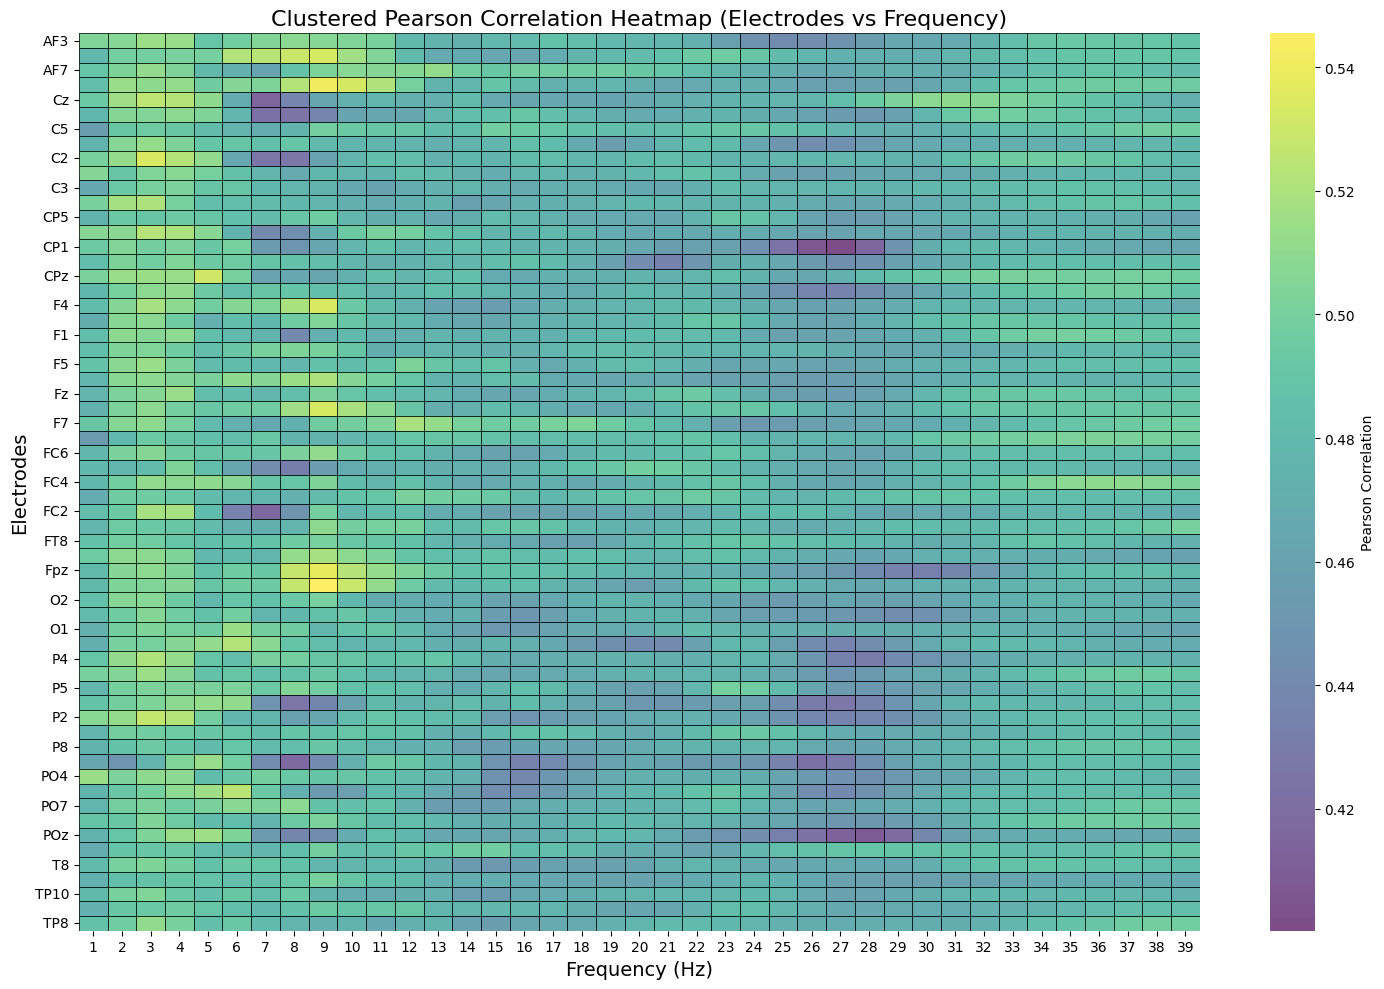

In [6]:
import numpy as np
from scipy.stats import ttest_1samp
from sklearn.utils import resample

heatmap_array = heatmap_data.fillna(0).values

# Define clustering parameters
n_permutations = 1000
cluster_threshold = 0.5

# Compute the observed t-statistics (test against 0 correlation as null hypothesis)
t_obs, p_values = ttest_1samp(heatmap_array, popmean=0, axis=1)

# Permutation testing to generate a null distribution
t_perm_max = []
t_perm_max = []
for _ in range(n_permutations):
    # Shuffle the data along the frequency dimension for each electrode
    permuted_data = np.apply_along_axis(np.random.permutation, axis=1, arr=heatmap_array)
    t_perm, _ = ttest_1samp(permuted_data, popmean=0, axis=1)
    t_perm_max.append(np.max(np.abs(t_perm)))

# Determine the critical value from the null distribution
t_critical = np.percentile(t_perm_max, 100 * (1 - cluster_threshold))

# Identify significant clusters (where |t_obs| > t_critical)
significant_clusters = np.abs(t_obs) > t_critical

# Create a mask for significant clusters
cluster_mask = np.zeros_like(heatmap_array, dtype=bool)
cluster_mask[significant_clusters, :] = True

# Plot the heatmap with significant clusters highlighted
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap='viridis',
    cbar_kws={'label': 'Pearson Correlation'},
    annot=False,
    linewidths=0.5,
    linecolor='black',
    alpha=0.7
)

# Overlay contours for significant clusters
ax.contour(cluster_mask, colors='white', linewidths=1.5, levels=[0.5])

# Adjust labels and title
ax.set_title('Clustered Pearson Correlation Heatmap (Electrodes vs Frequency)', fontsize=16)
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('Electrodes', fontsize=14)
plt.tight_layout()
plt.show()

<Axes: xlabel='frequency_Hz', ylabel='electrode'>

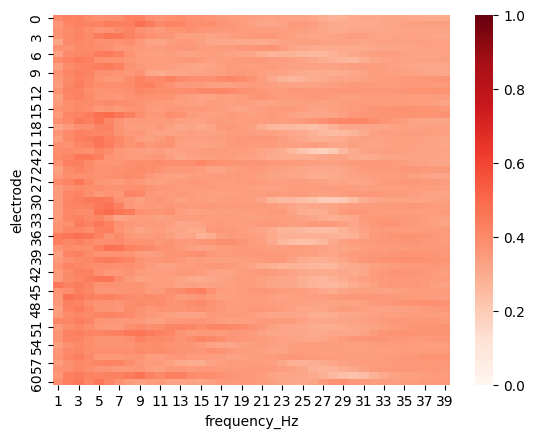

In [22]:
sns.heatmap(pivoted, vmin=0, vmax=1, cmap='Reds')

In [8]:
import pandas as pd
df_pupil = pd.read_csv('/home/slouviot/01_projects/eeg_brain_state_prediction/data/prediction_pupil_only.csv')
df_pupil['features'] = 'pupil dilation'
df_all = pd.read_csv('/home/slouviot/01_projects/eeg_brain_state_prediction/data/prediction_pupil_and_gfp.csv')
df_all['features'] = 'pupil dilation and gfp'
merged = pd.concat([df_pupil, df_all], axis = 0)

In [37]:
merged

,Unnamed: 0,iteration,subject,session,run,task,ts_CAPS,pearson_r,eye_features,eeg_features_channel,eeg_features_band,features
0,0,0,sub-01,ses-01,run-01,task-checker,tsCAP1,0.646971,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
1,1,0,sub-01,ses-01,run-01,task-checker,tsCAP2,0.622542,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
2,2,0,sub-01,ses-01,run-01,task-checker,tsCAP3,0.435859,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
3,3,0,sub-01,ses-01,run-01,task-checker,tsCAP4,0.398693,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
4,4,0,sub-01,ses-01,run-01,task-checker,tsCAP5,0.461929,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
...,...,...,...,...,...,...,...,...,...,...,...,...
443,443,0,sub-04,ses-02,run-01,task-rest,tsCAP6,0.281929,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation and gfp
444,444,0,sub-04,ses-01,run-01,task-rest,tsCAP7,0.054942,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation and gfp
445,445,0,sub-04,ses-02,run-01,task-rest,tsCAP7,0.252124,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation and gfp
446,446,0,sub-04,ses-01,run-01,task-rest,tsCAP8,0.062994,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation and gfp


(<Figure size 600x300 with 1 Axes>, <Axes: ylabel='Correlation(yhat,ytest)'>)

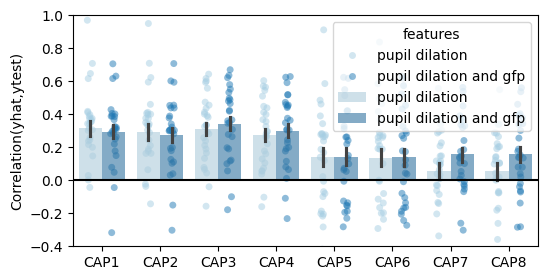

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_corr(df_pearson_r):
    df_pearson_r = df_pearson_r.sort_values(by = ['subject', 'ts_CAPS']).reset_index()        
    fig, ax = plt.subplots(figsize=(6,3))
    sns.stripplot(data = df_pearson_r,
                x = 'ts_CAPS',
                y = 'pearson_r',
                hue = 'features',
                ax = ax,
                palette = 'Paired',
                alpha=0.5, 
                size=5, 
                zorder=0,
                dodge = True,
                )

    sns.barplot(data = df_pearson_r, 
                x = 'ts_CAPS', 
                y = 'pearson_r', 
                errorbar = ('ci',68),
                ax = ax, 
                palette = 'Paired',
                alpha=0.6, 
                width=0.8, 
                zorder=1,
                hue = 'features'
                )

    caps_names = ['CAP1','CAP2','CAP3','CAP4','CAP5','CAP6','CAP7','CAP8']
    plt.ylim(-0.4,1)
    plt.xlabel('')
    plt.ylabel('Correlation(yhat,ytest)')#, size = 12)
    plt.xticks(ticks = np.arange(8), labels = caps_names)#, size = 12)
    plt.axhline(0, 
                linewidth = 1.5,
                color = 'black')
    
    #plt.axhline(0.5, 
    #            linestyle = '--',
    #            linewidth = 1,
    #            color = "black",
    #            alpha = 0.5)
    
    return fig, ax
merged_checker = merged[merged['task'] == 'task-checker']
plot_corr(merged_checker)

In [12]:
merged_checker.to_csv('/home/slouviot/01_projects/eeg_brain_state_prediction/data/merged_pupil_gfp_checker.csv')

/tmp/ipykernel_2365374/2626263796.py:71: UserWarning: You passed a edgecolor/edgecolors ((0.6509803921568628, 0.807843137254902, 0.8901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_2365374/2626263796.py:71: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.47058823529411764, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_2365374/2626263796.py:71: UserWarning: You passed a edgecolor/edgecolors ((0.6980392156862745, 0.8745098039215686, 0.5411764705882353)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_2365374/2626263796.py:71: UserWarning: You passed a edgecolor/edgecolors ((0.2, 0

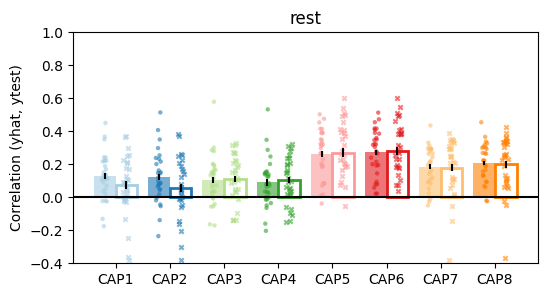

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

merged_checker = merged[merged['task'] == 'task-rest']
def plot_corr_with_jitter(df_pearson_r):
    df_pearson_r = df_pearson_r.sort_values(by=['subject', 'ts_CAPS']).reset_index()
    fig, ax = plt.subplots(figsize=(6, 3))

    caps_names = ['CAP1', 'CAP2', 'CAP3', 'CAP4', 'CAP5', 'CAP6', 'CAP7', 'CAP8']
    unique_features = df_pearson_r['features'].unique()
    if len(unique_features) != 2:
        raise ValueError("The function expects exactly two unique features.")

    # Assign CAP colors
    cap_colors = sns.color_palette('Paired', len(caps_names))

    # Bar width adjustment
    bar_width = 0.4
    offsets = [-bar_width / 2, bar_width / 2]

    # Marker styles for the features
    feature_markers = {'pupil dilation': 'o', 'pupil dilation and gfp': 'x'}

    for i, feature in enumerate(unique_features):
        feature_data = df_pearson_r[df_pearson_r['features'] == feature]
        for j, cap in enumerate(caps_names):
            cap_data = feature_data[feature_data['ts_CAPS'] == f'tsCAP{j+1}']
            
            if feature == 'pupil dilation':
                kwargs = {"edgecolors": "none"}
            else:
                kwargs = {"edgecolors": cap_colors[j]}

            if not cap_data.empty:
                # X positions
                x_position = j + offsets[i]

                # Compute confidence interval for error bars
                mean_value = cap_data['pearson_r'].mean()
                std_dev = cap_data['pearson_r'].std()
                ci_68 = std_dev / np.sqrt(len(cap_data)) * 0.68

                # Bar style: filled or outline
                if feature == 'pupil dilation':
                    # Filled bar with no edge color
                    ax.bar(
                        x_position,
                        mean_value,
                        yerr=ci_68,
                        width=bar_width,
                        color=cap_colors[j],
                        alpha=0.6,
                        label=feature if j == 0 else None
                    )
                else:
                    # Outlined bar with edge color
                    ax.bar(
                        x_position,
                        mean_value,
                        yerr=ci_68,
                        width=bar_width,
                        color='white',
                        edgecolor=cap_colors[j],
                        linewidth=2,
                        label=feature if j == 0 else None
                    )

                # Add scatter points with jitter for the stripplot
                jittered_positions = np.random.normal(x_position, 0.03, size=len(cap_data))
                ax.scatter(
                    jittered_positions,
                    cap_data['pearson_r'],
                    color=cap_colors[j],
                    alpha=0.6,
                    marker=feature_markers[feature],
                    s = 10,
                    label=None,
                    **kwargs,
                )

    plt.ylim(-0.4, 1)
    plt.xlabel('')
    plt.ylabel('Correlation (yhat, ytest)')
    plt.xticks(ticks=np.arange(len(caps_names)), labels=caps_names)
    plt.axhline(0, linewidth=1.5, color='black')
    #plt.legend(title="Features",bbox_to_anchor=(1, 1))
    plt.title("rest")

    return fig, ax

# Visualize the final output with jitter
fig, ax = plot_corr_with_jitter(merged_checker)
fig.savefig('/home/slouviot/01_projects/eeg_brain_state_prediction/figures/pupil_pupil_and_gfp_rest.png', bbox_inches='tight', dpi=300)
plt.show()

/home/slouviot/01_projects/eeg_brain_state_prediction/src/combine_data.py:1016: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data = df_pearson_r,
/home/slouviot/01_projects/eeg_brain_state_prediction/src/combine_data.py:1026: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_pearson_r,


(<Figure size 600x300 with 1 Axes>, <Axes: ylabel='Correlation(yhat,ytest)'>)

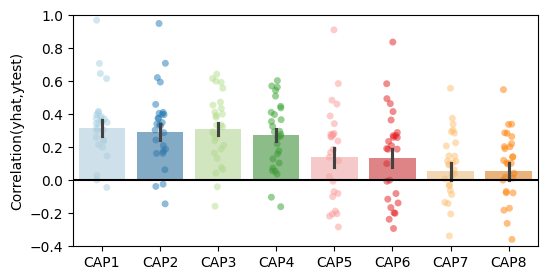

In [10]:
import src.combine_data as combine_data
combine_data.plot_corr(df_pupil[df_pupil['task'] == 'task-checker'])

In [ ]:
cap1.drop(columns=['Unnamed: 0'], inplace = True)


In [8]:
df_pupil

,Unnamed: 0,iteration,subject,session,run,task,ts_CAPS,pearson_r,eye_features,eeg_features_channel,eeg_features_band,features
0,0,0,sub-01,ses-01,run-01,task-checker,tsCAP1,0.646971,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
1,1,0,sub-01,ses-01,run-01,task-checker,tsCAP2,0.622542,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
2,2,0,sub-01,ses-01,run-01,task-checker,tsCAP3,0.435859,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
3,3,0,sub-01,ses-01,run-01,task-checker,tsCAP4,0.398693,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
4,4,0,sub-01,ses-01,run-01,task-checker,tsCAP5,0.461929,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
...,...,...,...,...,...,...,...,...,...,...,...,...
451,451,0,sub-04,ses-02,run-01,task-rest,tsCAP6,0.200371,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
452,452,0,sub-04,ses-01,run-01,task-rest,tsCAP7,0.083113,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
453,453,0,sub-04,ses-02,run-01,task-rest,tsCAP7,0.163068,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
454,454,0,sub-04,ses-01,run-01,task-rest,tsCAP8,0.093225,"['pupil_dilation', 'first_derivative', 'second...",NaN,NaN,pupil dilation
